<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
## Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
            
    - **Reference**
    
    [https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# conda install -c conda-forge mlxtend
!pip install mlxtend  
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

# Graphs and charts 
!pip install plotly==5.5.0
import plotly.graph_objects as go
import plotly.express as px

In [8]:
# breast-cancer-wisconsin-data-old.csv
bc = pd.read_csv('../DATA/breast-cancer-wisconsin-data-old.csv',names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
bc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
bc.columns = bc.columns.str.replace(' ','_')

In [14]:
bc.columns = bc.columns.str.lower()

In [15]:
bc.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [16]:
print("Number of rows:", len(bc))
print("Number of columns:", bc.shape[1])
bc.shape

Number of rows: 699
Number of columns: 11


(699, 11)

In [17]:
bc.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [18]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sample_code_number           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [30]:
bc['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [35]:
feat = bc.loc[bc['bare_nuclei']=='?',:]

In [45]:
bc.drop(feat.index, axis=0, inplace=True)

In [51]:
bc['bare_nuclei']=bc['bare_nuclei'].astype(dtype='int64')

In [52]:
bc.dtypes

sample_code_number             int64
clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [28]:
bc.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [20]:
for uniq_data in bc:
    print(uniq_data)
    values, counts = np.unique(bc[uniq_data], return_counts=True)
    print(values)
    print(counts)

sample_code_number
[   61634    63375    76389    95719   128059   142932   144888   145447
   160296   167528   169356   183913   183936   188336   191250   242970
   255644   263538   274137   303213   314428   320675   324382   324427
   333093   342245   352431   353098   369565   378275   385103   390840
   411453   412300   428598   428903   431495   432809   434518   452264
   456282   466906   474162   476903   486283   486662   488173   492268
   492561   493452   508234   521441   527337   527363   529329   534555
   535331   536708   543558   555977   557583   558538   560680   561477
   563649   566346   566509   601265   603148   606140   606722   608157
   616240   625201   635844   636130   636375   636437   640712   640744
   646904   653777   654244   654546   657753   659642   666090   666942
   667204   672113   673637   677910   684955   685977   688033   690557
   691628   693702   695091   695219   704097   704168   706426   709287
   714039   718641   721482   73

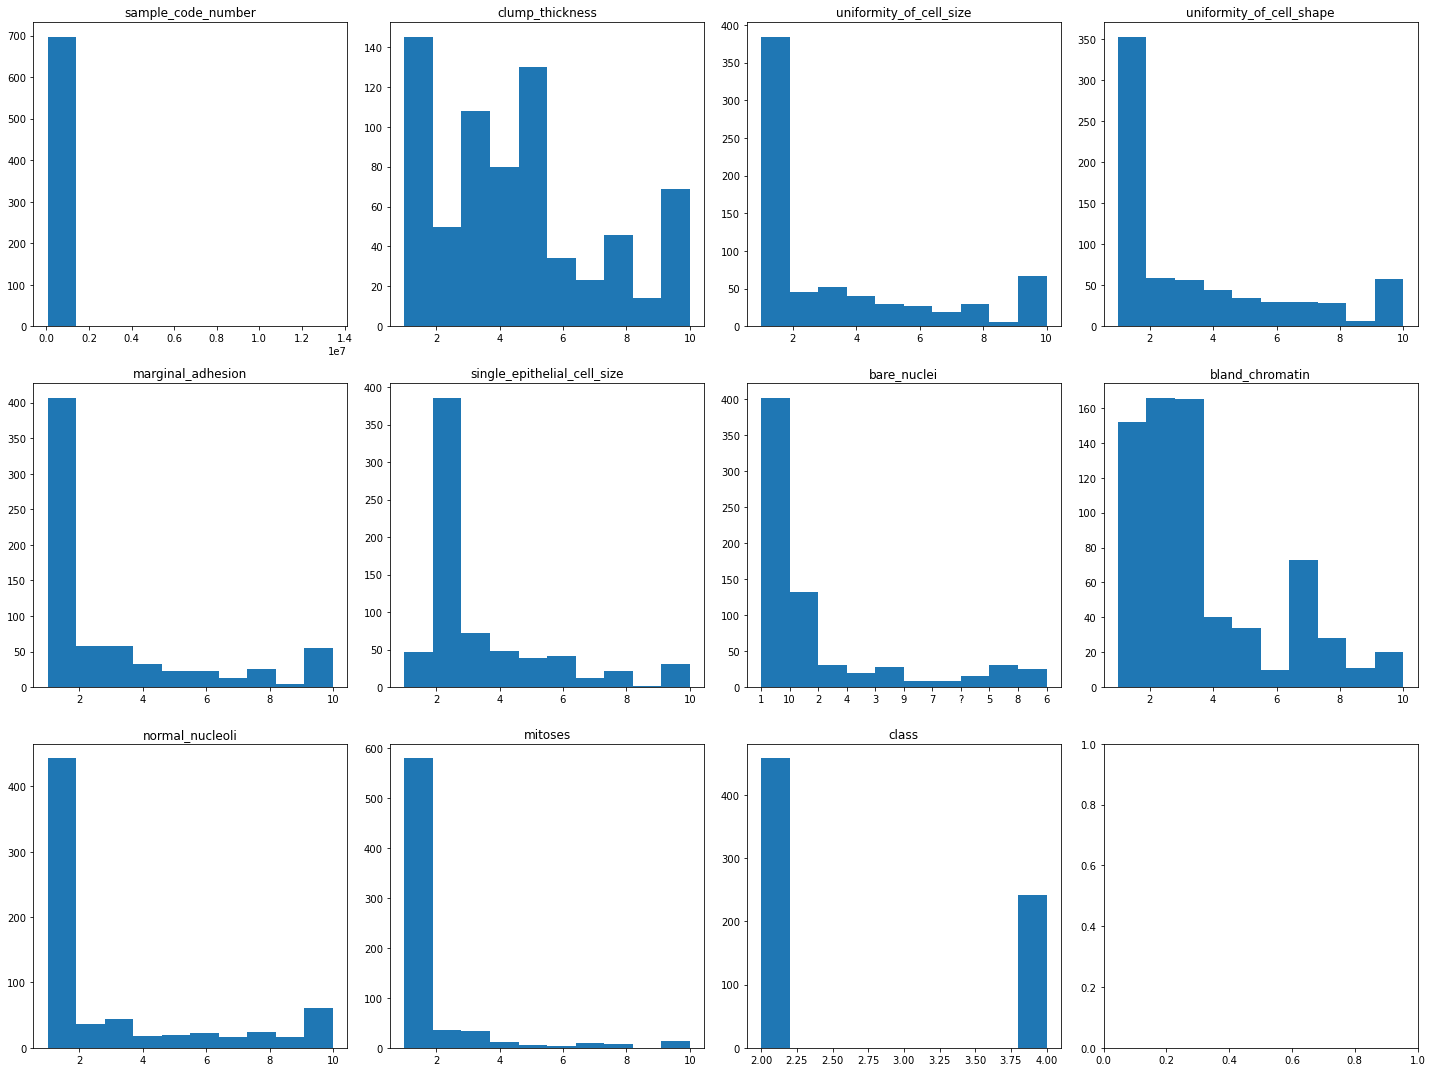

In [25]:
plt.subplots(3,4, figsize=(20,15))  
num=1
for feat in bc.columns:
    plt.subplot(3,4,num)
    plt.hist(x=bc[feat],bins=10)
    plt.title(f'{feat}')
    num+=1
    
plt.tight_layout()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [53]:
feat=[col for col in bc.columns[1:] if col !='class']

In [54]:
feat

['clump_thickness',
 'uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

In [55]:
X=bc[feat]
y=bc['class']

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [56]:
y.value_counts()

2    444
4    239
Name: class, dtype: int64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [58]:
tree = DecisionTreeClassifier(max_depth=10,criterion='entropy',random_state=42)

In [59]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [62]:
tree.score(X_train,y_train)

1.0

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
params = {
    'criterion':['entropy','gini'],
    'max_depth':[3,5,7],
    'splitter':['best','random']
}

In [66]:
gs=GridSearchCV(estimator=tree, param_grid=params,cv=3)

In [67]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'splitter': ['best', 'random']})

In [68]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [60]:
bagg = BaggingClassifier(tree,n_estimators=10,random_state=42)

In [61]:
bagg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=10,
                                                        random_state=42),
                  random_state=42)

In [63]:
bagg.score(X_train,y_train)

0.9978118161925602

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

© 2020 Institute of Data